In [1]:
import random as rand
import numpy as np
import scipy.stats as st
import math
import scipy.special
import matplotlib
import matplotlib.pyplot as plt
import os
import binascii
import shutil

In [2]:
def read(file_name):
    return np.fromfile(file_name, dtype=int)

In [3]:
#register size 
rs = 32

sigma = 5 #math.sqrt(439.56)

dir = "sim_2bit_alt"

N = 1600
SR = np.zeros(N)
diritem = os.listdir(dir)

In [4]:
N = 1600
SR = np.zeros(N)
es = 0 
sigma = math.sqrt(439.56)

nsim = 100
i = 0

diritem = os.listdir(dir) 

for i in range(nsim):
    
    # getting the intermediate values 
    v0 = read(dir + "/" + diritem[i] + "/trc0")
    v1 = read(dir + "/" + diritem[i] + "/trc1") # getting the intermediate values 
    
    # generating the noisy leakage values 
    l0 = [np.random.normal(v,sigma,1) for v in v0]
    l1 = [np.random.normal(v,sigma,1) for v in v1]
        
    p00 = 0
    p01 = 0 
    p10 = 0
    p11 = 0
    SR[0] = 0.5
    
    # for different number of points 
    j = 0
    
    while ( j < N-1 ):
        
        es += abs(v0[j] - v1[j])
        
        p00 += st.norm.logpdf(l0[j], v0[j], sigma)
        p01 += st.norm.logpdf(l0[j], v1[j], sigma)
        p10 += st.norm.logpdf(l1[j], v0[j], sigma)
        p11 += st.norm.logpdf(l1[j], v1[j], sigma)
        
        SR[j+1] = SR[j+1] + (int(p00>p01)+int(p11>p10))/2.0
        
        j = j+1

SR = SR/(i+1)
es = es/(i*j)

SR00182 = SR 

In [5]:
SR = np.zeros(N)
es = 0 
sigma = math.sqrt(80)

i = 0

diritem = os.listdir(dir) 

for i in range(nsim):
    
    # getting the intermediate values 
    v0 = read(dir + "/" + diritem[i] + "/trc0")
    v1 = read(dir + "/" + diritem[i] + "/trc1") # getting the intermediate values 
    
    # generating the noisy leakage values 
    l0 = [np.random.normal(v,sigma,1) for v in v0]
    l1 = [np.random.normal(v,sigma,1) for v in v1]
        
    p00 = 0
    p01 = 0 
    p10 = 0
    p11 = 0
    SR[0] = 0.5
    
    # for different number of points 
    j = 0
    
    while ( j < N-1 ):
        
        es += abs(v0[j] - v1[j])
        
        p00 += st.norm.logpdf(l0[j], v0[j], sigma)
        p01 += st.norm.logpdf(l0[j], v1[j], sigma)
        p10 += st.norm.logpdf(l1[j], v0[j], sigma)
        p11 += st.norm.logpdf(l1[j], v1[j], sigma)
        
        SR[j+1] = SR[j+1] + (int(p00>p01)+int(p11>p10))/2.0
        
        j = j+1

SR = SR/(i+1)
es = es/(i*j)

SR01 = SR 

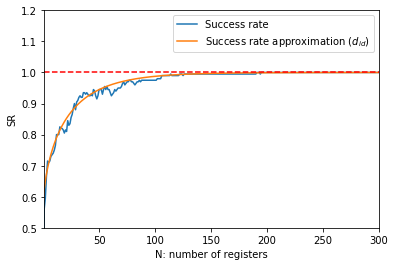

In [6]:
cMLattack = 4/(2*sigma)
srest = [st.norm.cdf(math.sqrt(i+1)*cMLattack) for i in range(N)]

plt.xlim(xmin=1,xmax=300)
plt.ylim(ymin=0.5,ymax=1.2)
plt.plot(SR, label='Success rate')
plt.plot(srest, label='Success rate approximation ($d_{id}$)')
plt.legend(loc='best')
plt.xlabel('N: number of registers')
plt.ylabel('SR')
plt.axhline(y=1, color='r', linestyle='--')
plt.show()

In [7]:
N = 1600
SR = np.zeros(N)
es = 0 
sigma = math.sqrt(16)

i = 0

diritem = os.listdir(dir) 
for i in range(nsim):
    
    # getting the intermediate values 
    v0 = read(dir + "/" + diritem[i] + "/trc0")
    v1 = read(dir + "/" + diritem[i] + "/trc1") # getting the intermediate values 
    
    # generating the noisy leakage values 
    l0 = [np.random.normal(v,sigma,1) for v in v0]
    l1 = [np.random.normal(v,sigma,1) for v in v1]

        
    p00 = 0
    p01 = 0 
    p10 = 0
    p11 = 0
    SR[0] = 0.5
    
    # for different number of points 
    j = 0
    
    while ( j < N-1 ):
        
        es += abs(v0[j] - v1[j])
        
        p00 += st.norm.logpdf(l0[j], v0[j], sigma)
        p01 += st.norm.logpdf(l0[j], v1[j], sigma)
        p10 += st.norm.logpdf(l1[j], v0[j], sigma)
        p11 += st.norm.logpdf(l1[j], v1[j], sigma)
        
        SR[j+1] = SR[j+1] + (int(p00>p01)+int(p11>p10))/2.0
        
        j = j+1

SR = SR/(i+1)
es = es/(i*j)

SR05 = SR

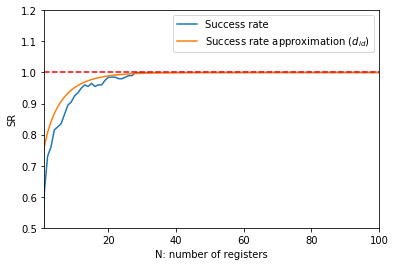

In [8]:
cMLattack = 4/(2*sigma)
srest = [st.norm.cdf(math.sqrt(i+1)*cMLattack) for i in range(N)]

plt.xlim(xmin=1,xmax=100)
plt.ylim(ymin=0.5,ymax=1.2)
plt.plot(SR, label='Success rate')
plt.plot(srest, label='Success rate approximation ($d_{id}$)')
plt.legend(loc='best')
plt.xlabel('N: number of registers')
plt.ylabel('SR')
plt.axhline(y=1, color='r', linestyle='--')
plt.show()

In [9]:
N = 1600
SR = np.zeros(N)
es = 0 
sigma = math.sqrt(8)

i = 0

diritem = os.listdir(dir) 
for i in range(nsim):
    
    # getting the intermediate values 
    v0 = read(dir + "/" + diritem[i] + "/trc0")
    v1 = read(dir + "/" + diritem[i] + "/trc1") # getting the intermediate values 
    
    # generating the noisy leakage values 
    l0 = [np.random.normal(v,sigma,1) for v in v0]
    l1 = [np.random.normal(v,sigma,1) for v in v1]
        
    p00 = 0
    p01 = 0 
    p10 = 0
    p11 = 0
    SR[0] = 0.5
    
    # for different number of points 
    j = 0
    
    while ( j < N-1 ):
        
        es += abs(v0[j] - v1[j])
        
        p00 += st.norm.logpdf(l0[j], v0[j], sigma)
        p01 += st.norm.logpdf(l0[j], v1[j], sigma)
        p10 += st.norm.logpdf(l1[j], v0[j], sigma)
        p11 += st.norm.logpdf(l1[j], v1[j], sigma)
        
        SR[j+1] = SR[j+1] + (int(p00>p01)+int(p11>p10))/2.0
        
        j = j+1

SR = SR/(i+1)
es = es/(i*j)

SR1 = SR 

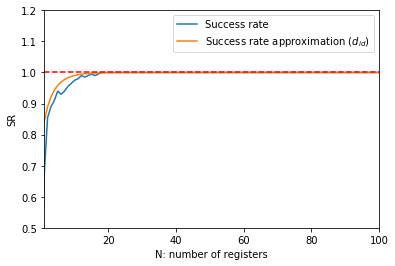

In [10]:
cMLattack = 4/(2*sigma)
srest = [st.norm.cdf(math.sqrt(i+1)*cMLattack) for i in range(N)]

plt.xlim(xmin=1,xmax=100)
plt.ylim(ymin=0.5,ymax=1.2)
plt.plot(SR, label='Success rate')
plt.plot(srest, label='Success rate approximation ($d_{id}$)')
plt.legend(loc='best')
plt.xlabel('N: number of registers')
plt.ylabel('SR')
plt.axhline(y=1, color='r', linestyle='--')
plt.show()

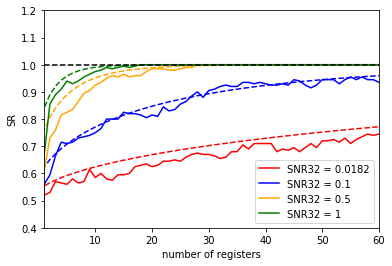

In [11]:
cMLattack = 4/(2*(math.sqrt(439.56)))
E00182 = [st.norm.cdf(math.sqrt(i+1)*cMLattack) for i in range(N)]

cMLattack = 4/(2*(math.sqrt(80)))
E01 = [st.norm.cdf(math.sqrt(i+1)*cMLattack) for i in range(N)]

cMLattack = 4/(2*(math.sqrt(8)))
E1 = [st.norm.cdf(math.sqrt(i+1)*cMLattack) for i in range(N)]

cMLattack = 4/(2*(math.sqrt(16)))
E05 = [st.norm.cdf(math.sqrt(i+1)*cMLattack) for i in range(N)]


plt.xlim(xmin=1,xmax=60)
plt.ylim(ymin=0.4,ymax=1.2)
plt.plot(SR00182, color='red', label="SNR32 = 0.0182")
plt.plot(E00182, 'r--', color='red')

plt.plot(SR01, color='blue',label="SNR32 = 0.1")
plt.plot(E01,'r--', color='blue')

plt.plot(SR05, color='orange', label="SNR32 = 0.5")
plt.plot(E05,'r--', color='orange')

plt.plot(SR1, color='green', label="SNR32 = 1")
plt.plot(E1,'r--', color='green')



plt.legend(loc='best')
plt.xlabel('number of registers')
plt.ylabel('SR')
plt.axhline(y=1, color='black', linestyle='--')

plt.savefig('SNRimpact.svg', format='svg', dpi=1000)
plt.show()